# HW 5

## Andrew Loeppky

## PHYS 509

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import gamma
from scipy.special import factorial as fac

## Question 1

If a light object with mass m is placed on a scale with “fat tails”, the reading on the scale follows a Student's t-distribution with 3 degrees of freedom centered at $m$ with a standard deviation of 1 mg.

**A.** Write down the likelihood function for obtaining a reading of $x$ milligrams on this scale.

---

A non-standardized Student's $t$ distribution is of the form:

$$
f(x|N, \hat{\sigma}) = \frac{\Gamma((N+1)/2)}{\sqrt{N\pi\hat{\sigma}^2}\Gamma(N/2)} \cdot \left(1 + \frac{(x-m)^2}{N\sigma^2}\right)^{-\frac{N+1}{2}}\tag{Wikipedia}
$$

The variance (also the SD for a single measurement) of a students $t$ distribution with $N>2$ is given by:

$$
stdev = \hat{\sigma}^2\frac{N}{N-2}
$$

solve for $\hat{\sigma}^2$ such that the standard deviation is 1 mg:

$$
\hat{\sigma}^2 = \frac{N-2}{N}
$$

Set $N = 3$ and $\hat{\sigma}^2 = 1/3$. Write out the likelihood



$$
\boxed{L(x) = \frac{\Gamma(2)}{\sqrt{\pi}\Gamma(3/2)} \cdot \left(1 + 3(x-m)^2{}\right)^{-2}}
$$

**B.** You use this scale to measure an object and obtain a reading of 0.5 mg. Assuming a flat prior on $m$, calculate a Bayesian 90% upper limit on the object's mass.

---

Flat prior that excludes negative mass:

$$
P(m|I) = \begin{cases} 
0
    &  m < 0 \\
&\\  % blank row
const
    & m > 0
\end{cases}
$$

With a flat prior:

$$
P(m|x,I) \propto P(x|m,I)
$$

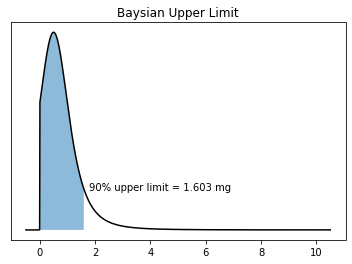

In [2]:
# specify parameters
m = 0.5
x = np.linspace(m-1, m+10, 1000)
N = 3

# set up the distribution
def student_t_dist(x, N, m=0):
    """
    outputs a stdents t distribution with N degrees of freedom,
    expected value m, and measured value x
    """
    sighat2 = (N - 2) / N

    fx = (
        gamma((N + 1) / 2)
        / (np.sqrt(N * np.pi * sighat2) * gamma(N / 2))
        * ((1 + ((x - m) ** 2 / (N * sighat2)))) ** (-(N + 1) / 2)
    )
    return fx

# get the likelihood with m=0.5
fx = student_t_dist(x, N, 0.5)

# apply prior
fx[x < 0] *= 0

# what is 90% of the area under likelihood fcn?
upperlim = np.sum(fx) * 0.9
integral = 0
j = 0 
# integrate until we get to 90% 
while integral < upperlim:
    integral += fx[j]
    j += 1

# plot it
plt.plot(x, fx, "k")
plt.title("Baysian Upper Limit")
plt.fill_between(x[0:j], 0, fx[0:j], alpha=0.5)
plt.annotate(f"90% upper limit = {round(x[j],3)} mg", (1.1*x[j],fx[j]))
plt.yticks([]);

**C.** Now calculate the Feldman-Cousins 90% confidence interval on $m$ for a reading of 0.5 mg.

---

Feldman-Cousins ordering principle:

$$
R = \frac{P(m|\mu)}{P(m|\mu_{best})}
$$

Re-order the likelihood function from highest to lowest (Im doing it numerically), and add up the values until we reach 90%

In [17]:
x = np.linspace(0, 100, 10000)
N = 3
fx = student_t_dist(x, N, 0.5)

mu_best = np.argmax(fx) # get the position of the maximum likelihood m
p_mu_best = fx[mu_best] # denominator of R
R = fx / p_mu_best # get R value for each m

fx_sorted = np.sort(fx)[::-1] # sort fx

# integrate to 90%
upperlim = np.sum(fx_sorted) * 0.9
integral = 0
j = 0 
# integrate until we get to 90% 
while integral < upperlim:
    integral += fx_sorted[j]
    j += 1


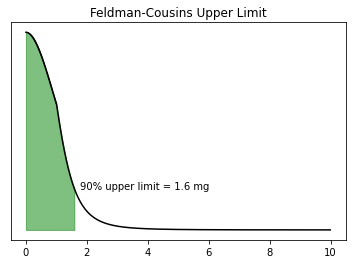

In [18]:
# plot it
plt.plot(x[:1000], fx_sorted[:1000], "k")
plt.title("Feldman-Cousins Upper Limit")
plt.fill_between(x[0:j], 0, fx_sorted[0:j], color="green", alpha=0.5)
plt.annotate(f"90% upper limit = {round(x[j],3)} mg", (1.1*x[j],fx_sorted[j]))
plt.yticks([]);

## Question 2

An experiment measures a total of 0 events in one hour, during which 5 background events were expected. Assume that both signal and background events obey Poisson statistics, and that we know the expected background rate exactly.

**A.** Let $s$ denote the expected number of signal events per hour. What is the Feldman-Cousins 90% upper limit on $s$?

---

From Feldman-Cousins paper, table IV, we read that the 90% confidence upper limit is $\boxed{0.98}$



**B.** Calculate the Bayesian 90% upper limit on the expected number of signal events per hour, assuming that the rate $B$ of 5 background events per hour is known perfectly. Assume a uniform prior for S. Plot the probability distribution for $S$. Comment on the dependence of your result on the value of $B$.

---

With a flat prior, the posterior is proportional to the likelihood:

$$
P(s|x,b,I) \propto P(x|s,b,I)
$$

Measured events are poisson with a frequency $s+b$ and a measured count $x$

$$
P(x|s,b,I) = \frac{e^{-(s + b)} (s + b)^x}{x!}
$$

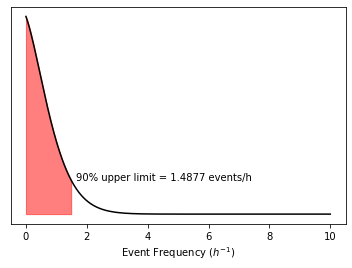

In [11]:
res = 0.0001  # numerical resolution
s = np.arange(0,10, res)  # true event freq (/h)
b = 5  # background freq (/h)
x = 0  # measured real event freq (/h)

# calculate the likelihood (dont bother normalizing)
ps = np.exp(-(s + b)) * (s + b) ** x / fac(s)

# what is 90% of the area under likelihood fcn?
upperlim = np.sum(ps) * 0.9
integral = 0
j = 0 
# integrate until we get to 90% 
while integral < upperlim:
    integral += ps[j]
    j += 1

# plot it
plt.plot(s, ps, color="k")
plt.fill_between(s[0:j], 0, ps[0:j], color="red", alpha=0.5)
plt.annotate(f"90% upper limit = {s[j]} events/h", (1.1*s[j],ps[j]))
plt.xlabel("Event Frequency ($h^{-1}$)")
plt.yticks([]);

**Comment on the dependence of your result on the value of $b$**

Do a mini-parameter sweep experiment:

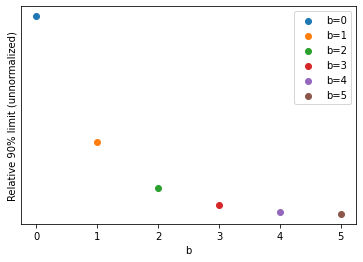

In [6]:
fig, ax = plt.subplots()
for b in range(6): 

    ps = np.exp(-(s + b)) * (s + b) ** x / fac(s)
    upperlim = np.sum(ps) * 0.9
    integral = 0
    j = 0 
    # integrate until we get to 90% 
    while integral < upperlim:
        integral += ps[j]
        j += 1
    
    ax.scatter(b, integral, label=f"{b=}")
    ax.legend()
    ax.set_yticks([])
    ax.set_xlabel("b")
    ax.set_ylabel("Relative 90% limit (unnormalized)")

*Smaller values of $b$ make for higher upper limits on the possible number of real events. This makes sense because with less background noise, we are more certain that detected events are true events, and not just a fluke spike in the background. On the other hand, real detected events have no dependence on the background or any other attribute of our sensor. The Baysesian treatment reflects our state of knowledge (is it a real event or noise), rather than the state of reality.*

**C.** Consider a different experiment in which we know nothing about the background rate $b$ but must measure it ourselves. We do this by removing the signal source for a while to measure the background rate $b$ alone. In one hour we detect 1 background event. We then put the signal source back, and measure 2 events in an hour (combined total of signal+background). Assuming uniform priors for $b$ and $s$, calculate the probability distribution $P(s)$ using Bayes' theorem. What is the probability that $s$ is less than 1/hour?

---

Background events are poisson with an expected value of b:


$$
P(b) = \frac{e^{-b} b^x}{x!}
$$

which is already normalized. Plug $b\cdot P(b)$ into $P(x|s,b,I)$ from above and marginalize over $b$ to get the likelihood:

$$
P(x|s,b,I) = \frac{\sum_0^\infty e^{-(s + bP(b))} (s + bP(b))^x\cdot db}{x!}
$$

In [7]:
# calculate P(b)
b = np.linspace(0,1000, 1000) # for our purposes 1000 ~= infinity
b_meas = 1.
pb = np.exp(-b_meas) * b_meas ** b / fac(b)
sum(pb) # sanity check

0.9991484782705347

In [8]:
res = 0.0001  # numerical resolution
s = np.arange(0,10, res)  # true event freq (/h)
x = 1  # measured real event freq (/h)

# calculate the likelihood, marginalizing over b
ps = [np.sum(np.exp(-(si + b*pb)) * (si + b*pb) ** x / fac(si)) for si in s]

# normalize (equiv to dividing by global)
ps /= sum(ps) * res

# sanity check #2
sum(ps) * res

1.0000000000000182

In [9]:
#######################################################
# What is the probability that s is less than 1/hour? #
#######################################################
sum(ps[s < 1]) * res

0.4643541789985852

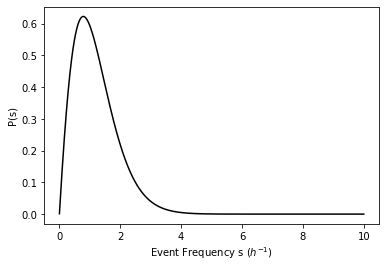

In [10]:
# show the distn
plt.plot(s, ps, "k")
plt.xlabel("Event Frequency s ($h^{-1}$)")
plt.ylabel("P(s)");

## Question 3

In this problem you will use the delta($\chi^2$) method to form a test statistic to discriminate between two types of events (let’s call them type $A$ and type $B$). See Lecture 17, slide 20 for the definition of this test statistic. You are given two large training sets of type $A$ events and type $B$ events. For each event two quantities have been measured: $x$ (first column in the file) and $y$ (second column), and there are 10,000 events in each training set. Use these training sets to define a delta($\chi^2$) statistic analogous to what is shown on the slide referred to above. You are also given two testing sets of type $A$ and type $B$ events. Apply your delta($\chi^2$) statistic to each testing set and plot the distributions of the test statistic for each type of events on the same plot. For a given event with $x=2.5$, $y=-0.5$, what fraction of type $A$ events have a higher value of this test statistic? What fraction of type $B$ events have a higher value? Given your results, can you calculate the probability that this particular event is of type $A$?

---